# MARKDOWN - OBETIVOS DO PROJETO

# 1. BIBLIOTECAS:

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 2. DATASET:

In [52]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [53]:
# INFORMAÇÕES BÁSICAS DO DATASET:
print("INFORMAÇÕES BÁSICAS DO DATASET")
print("="*50)

print(f"\n Shape do dataset: {df.shape}")
print(f"   • {df.shape[0]} registros")
print(f"   • {df.shape[1]} colunas")

print(f"\n Tipos de dados:")
print(df.dtypes)

print(f"\n Informações gerais:")
print(df.info())

print(f"\n Estatísticas descritivas:")
print(df.describe())

print(f"\n Valores nulos por coluna:")
print(df.isnull().sum())

INFORMAÇÕES BÁSICAS DO DATASET

 Shape do dataset: (89184, 84)
   • 89184 registros
   • 84 colunas

 Tipos de dados:
ResponseId               int64
Q120                    object
MainBranch              object
Age                     object
Employment              object
                        ...   
ProfessionalTech        object
Industry                object
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
Length: 84, dtype: object

 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-nu

# 3. ANÁLISE EXPLORATÓRIA DE DADOS (EDA):

## 3.1. DISTRIBUIÇÃO DO SALÁRIO ANUAL CONVERTIDO (TARGET) - ConvertedCompYearly:

In [54]:
# A. VALORES AUSENTES:
print("Quantidade de valores ausentes:", df['ConvertedCompYearly'].isnull().sum())
print("Porcentagem de valores ausentes:", 
      (df['ConvertedCompYearly'].isnull().sum() / len(df)) * 100)

Quantidade de valores ausentes: 41165
Porcentagem de valores ausentes: 46.15738249013276


In [55]:
# B. MEDIDAS DESCRITIVAS:
df['ConvertedCompYearly'].describe()

count    4.801900e+04
mean     1.031101e+05
std      6.814188e+05
min      1.000000e+00
25%      4.390700e+04
50%      7.496300e+04
75%      1.216410e+05
max      7.435143e+07
Name: ConvertedCompYearly, dtype: float64

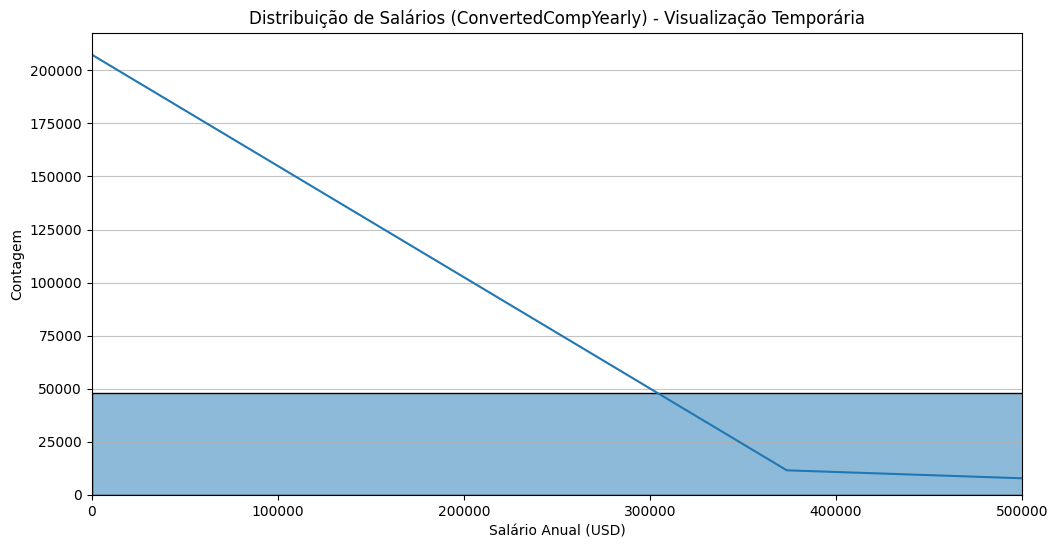

In [56]:
# C. HISTOGRAMA:
plt.figure(figsize=(12, 6))
sns.histplot(df['ConvertedCompYearly'].dropna(), bins=50, kde=True)
plt.title('Distribuição de Salários (ConvertedCompYearly) - Visualização Temporária')
plt.xlabel('Salário Anual (USD)')
plt.ylabel('Contagem')
plt.xlim(0, 500000)
plt.grid(axis='y', alpha=0.75)
plt.show()

Observações sobre o histograma:

- a. Limitamos o Eixo X (Temporariamente para Visualização):
    Definimos um limite máximo (U$500.000) para o eixo X para possibilitar a visulização da distribuição da maioria dos dados, mesmo que os outliers fiquem fora da visualização.
- b. O histograma revela uma distribuição altamente assimétrica, com a grande maioria dos salários concentrada na faixa mais baixa. A curva KDE (kde=True) é essencial para ver a forma da distribuição, que parece ter uma "cauda longa" para a direita, indicando a presença de salários mais altos

(0.0, 500000.0)

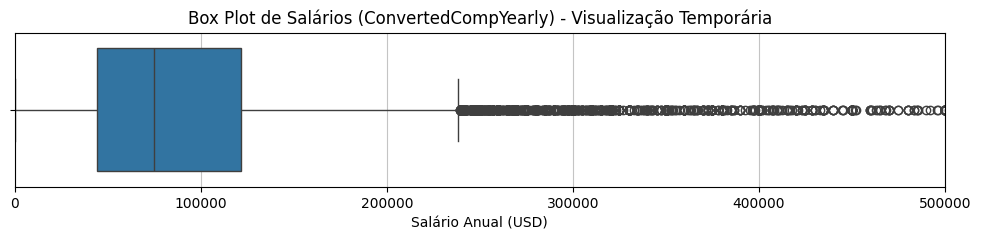

In [57]:
# D. BOXPLOT:
plt.figure(figsize=(12, 2))
sns.boxplot(x=df['ConvertedCompYearly'].dropna())
plt.title('Box Plot de Salários (ConvertedCompYearly) - Visualização Temporária')
plt.xlabel('Salário Anual (USD)')
plt.grid(axis='x', alpha=0.75)
plt.xlim(0, 500000)

Observações sobre o boxplot:

- a. A caixa representa o intervalo interquartil (IQR), onde 50% dos dados estão (aproximadamente entre U$5.000 e U$11.000)
- b. Há muitos pontos acima do whisker superior (Q3 + 1,5*IQR). O que pode ser um indício de outliers.  Isso confirma a presença de muitos salários extremamente altos que distorcem a distribuição

# 4. TRATAMENTO DE OUTLIERS E TRANSFORMAÇÃO DO TARGET:

In [58]:
# REMOVER AS LINHAS ONDE O SALÁRIO É NULO:
df_log = df.dropna(subset=['ConvertedCompYearly']).copy()

# TRANSFORMAR O TARGET (SALÁRIO) EM LOG:
df_log['ConvertedCompYearly_log'] = np.log1p(df_log['ConvertedCompYearly'])

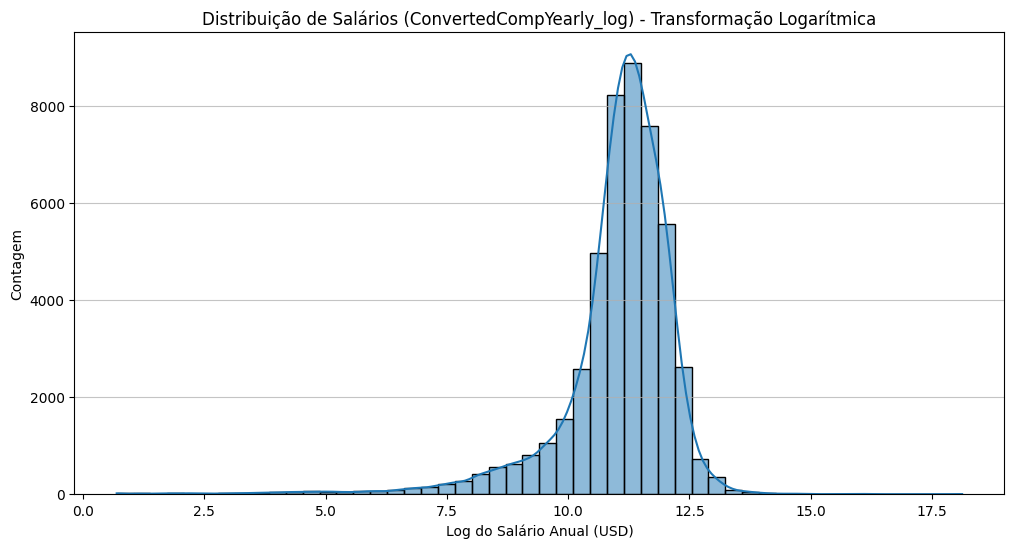

In [59]:
# HISTOGRAMA COM A TRANSFORMAÇÃO LOGARÍTMICA:
plt.figure(figsize=(12, 6))
sns.histplot(df_log['ConvertedCompYearly_log'], bins=50, kde=True)
plt.title('Distribuição de Salários (ConvertedCompYearly_log) - Transformação Logarítmica')
plt.xlabel('Log do Salário Anual (USD)')
plt.ylabel('Contagem')
plt.grid(axis='y', alpha=0.75)
plt.show()

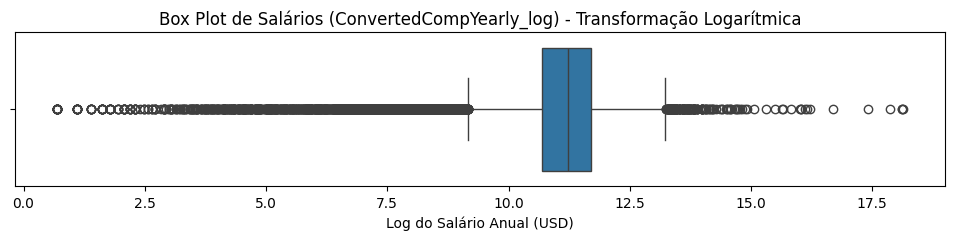

In [60]:
# BOXPLOT COM A TRANSFORMAÇÃO LOGARÍTMICA:
plt.figure(figsize=(12, 2))
sns.boxplot(x=df_log['ConvertedCompYearly_log'])
plt.title('Box Plot de Salários (ConvertedCompYearly_log) - Transformação Logarítmica')
plt.xlabel('Log do Salário Anual (USD)')
plt.show()

In [61]:
# DESCRIBE A VARIÁVEL ALVO TRANSFORMADA:
df_log['ConvertedCompYearly_log'].describe()

count    48019.000000
mean        11.019407
std          1.234126
min          0.693147
25%         10.689852
50%         11.224763
75%         11.708838
max         18.124314
Name: ConvertedCompYearly_log, dtype: float64

# 5. FEATURE ENGENEERING:

## 5.1. 'EdLevel':

In [62]:
# VALORES UNICOS NA COLUNA 'EdLevel':
df_log['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          22540
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13045
Some college/university study without earning a degree                                 5654
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2297
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2169
Associate degree (A.A., A.S., etc.)                                                    1596
Something else                                                                          496
Primary/elementary school                                                               222
Name: count, dtype: int64

In [63]:
# ORDEM DOS NÍVEIS DE EDUCAÇÃO:
ed_level_mapping = {
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1,
    'Some college/university study without earning a degree': 2,
    'Associate degree': 3,
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 4,
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 5,
    'Professional degree (JD, MD, etc.)': 6,
    'Other doctoral degree (Ph.D., Ed.D., etc.)': 7,
    'Something else': 0,
    'Prefer not to say': 0
}

In [64]:
# CRIAR UMA NOVA COLUNA COM OS NÍVEIS DE EDUCAÇÃO MAPEADOS:
df_log['EdLevel_numeric'] = df_log['EdLevel'].map(ed_level_mapping)
df_log['EdLevel_numeric'].value_counts()

EdLevel_numeric
4.0    22540
5.0    13045
2.0     5654
1.0     2169
0.0      496
Name: count, dtype: int64

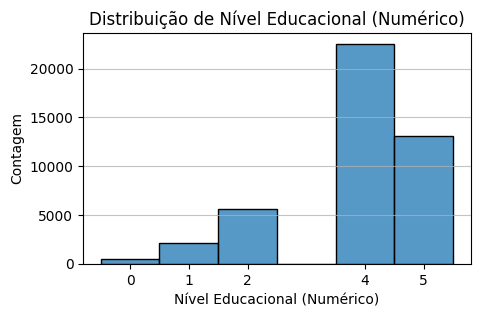

In [69]:
# DISTRIBUIÇÃO DO NÍVEL EDUCACIONAL (NUMÉRICO):
plt.figure(figsize=(5, 3))
sns.histplot(df_log['EdLevel_numeric'].dropna(), bins=len(ed_level_mapping) - 2, kde=False, discrete=True) # bins = número de categorias válidas
plt.title('Distribuição de Nível Educacional (Numérico)')
plt.xlabel('Nível Educacional (Numérico)')
plt.ylabel('Contagem')
plt.xticks(sorted(df_log['EdLevel_numeric'].dropna().unique())) # Para exibir os ticks nos números das categorias
plt.grid(axis='y', alpha=0.75)
plt.show()